In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
import math
import numpy as np

In [2]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'

In [3]:
response=requests.get(query)

In [4]:
df = pd.DataFrame(response.json()['historical'])

In [5]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-03,49341.066406,49462.562500,48457.988281,49462.562500,49462.562500,4.080373e+10,4.080373e+10,121.49609,0.246,49127.70443,"September 03, 21",0.00246
1,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,3.950807e+10,3.950807e+10,519.87500,1.065,49441.15495,"September 02, 21",0.01065
2,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710
3,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303
4,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-07,610.572998,614.544983,608.513000,614.544006,614.544006,7.503240e+07,7.503240e+07,3.97101,0.650,612.53400,"September 07, 16",0.00650
1823,2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648
1824,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1825,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df_2 = df[['date', 'adjClose']]

In [8]:
df_2

,date,adjClose
0,2021-09-03,49462.562500
1,2021-09-02,49327.722656
2,2021-09-01,48847.027344
3,2021-08-31,47166.687500
4,2021-08-30,47054.984375
...,...,...
1822,2016-09-07,614.544006
1823,2016-09-06,610.435974
1824,2016-09-05,606.590027
1825,2016-09-04,608.633972


In [9]:
date = pd.to_datetime('2018-09-01')

In [10]:
df_3years = df_2[df_2['date']>date]

In [11]:
df_3years = df_3years.set_index('date')

In [12]:
df_3years

,adjClose
date,
2021-09-03,49462.562500
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


In [13]:
y = df_3years.adjClose

<AxesSubplot:xlabel='date'>

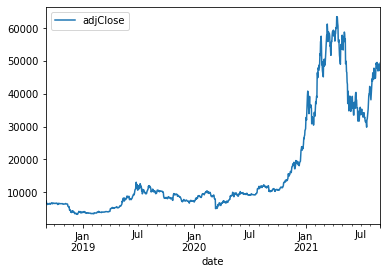

In [14]:
df_3years.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
# 0 diff
print('p-value: ', adfuller(y)[1])

p-value:  0.2779853847729158


In [17]:
# First diff
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  3.398721292426197e-16


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

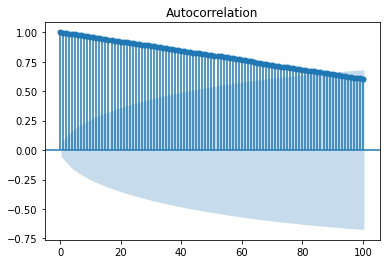

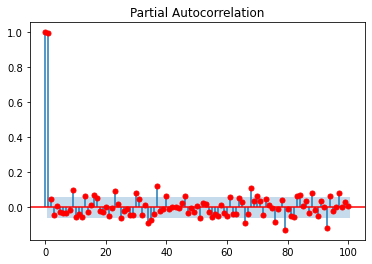

In [19]:
plot_acf(df_3years['adjClose'], lags=100);
plot_pacf(df_3years['adjClose'], lags=100, c='r');

## Log-differenced data

In [20]:
log_data = np.log(df_3years['adjClose'])

In [21]:
log_data_diff = log_data.diff()

In [22]:
log_diffed_data = pd.DataFrame(log_data_diff.drop(df_3years.index[0]))

In [23]:
log_diffed_data

,adjClose
date,
2021-09-02,-0.002730
2021-09-01,-0.009793
2021-08-31,-0.035006
2021-08-30,-0.002371
2021-08-29,0.037025
...,...
2018-09-06,0.009557
2018-09-05,0.039588
2018-09-04,0.080418


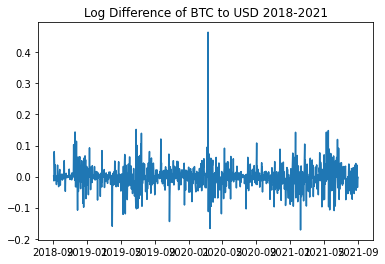

In [24]:
plt.plot(log_diffed_data)
plt.title("Log Difference of BTC to USD 2018-2021")
plt.show()

In [25]:
ad_fuller_result = adfuller(log_diffed_data['adjClose'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -15.314575315102754
p-value: 4.142446187366805e-28


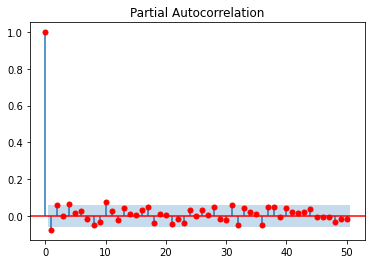

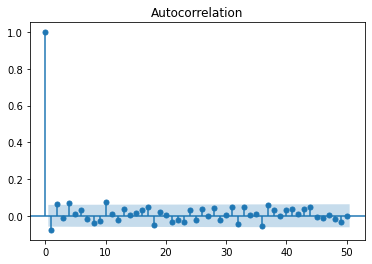

In [26]:
plot_pacf(log_diffed_data['adjClose'], lags=50, c='r');
plot_acf(log_diffed_data['adjClose'], lags=50);

## Differencing 

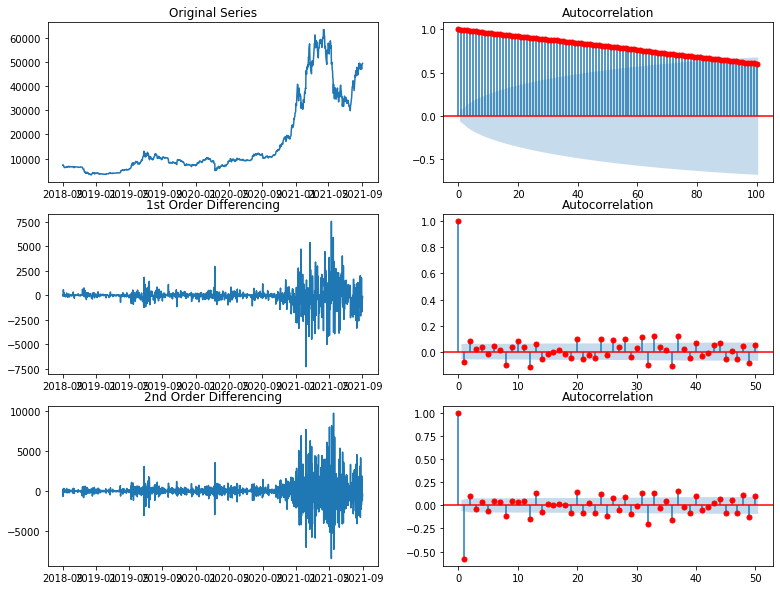

In [27]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, lags=100, ax=axes[0, 1], c='r')

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), lags=50, ax=axes[1, 1], c='r')

# 2nd Differencing 
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), lags=50, ax=axes[2, 1], c='r')

plt.show()

In [28]:
y_diff = y.diff().dropna()

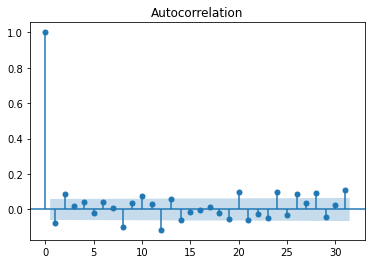

In [29]:
plot_acf(y_diff);

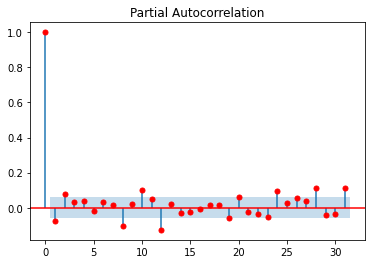

In [30]:
plot_pacf(y_diff, c='r');

## Train/Test split

In [31]:
train = df_3years[:878]

In [32]:
train

,adjClose
date,
2021-09-03,49462.562500
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
...,...
2019-04-14,5167.722168
2019-04-13,5096.586426
2019-04-12,5089.539063


In [33]:
test = df_3years[878:]

In [34]:
test

,adjClose
date,
2019-04-09,5204.958496
2019-04-08,5289.770996
2019-04-07,5198.896973
2019-04-06,5059.817383
2019-04-05,5036.681152
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


## ARIMA ON DF

In [35]:
from statsmodels.tsa.arima_model import ARIMA
# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 1))

# 2. fit the models
arima = arima.fit()

arima.summary()

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28548D+00    |proj g|=  5.96856D-05

At iterate    5    f=  8.28548D+00    |proj g|=  2.02505D-05

At iterate   10    f=  8.28548D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.776D-07   8.285D+00
  F =   8.2854797187341322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                 1097
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9089.171
Method:                       css-mle   S.D. of innovations            959.618
Date:                Fri, 03 Sep 2021   AIC                          18186.343
Time:                        09:32:56   BIC                          18206.344
Sample:                             1   HQIC                         18193.910
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -38.4591     27.489     -1.399      0.162     -92.337      15.418
ar.L1.D.adjClose    -0.5841      0.173     -3.375      0.001      -0.923      -0.245
ma.L1.D.adjClose     0.5029      0.184      2.738      0.006       0.143       0.863
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7120           +0.0000j            1.7120            0.5000
MA.1           -1.9883           +0.0000j            1.9883            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA ON TRAIN DF

In [36]:
arima_train = ARIMA(train, order=(1, 1, 1)).fit()
arima_train.summary()

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39463D+00    |proj g|=  7.19425D-05

At iterate    5    f=  8.39463D+00    |proj g|=  5.32907D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     18      1     0     0   1.776D-07   8.395D+00
  F =   8.3946292285012891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                  877
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7362.090
Method:                       css-mle   S.D. of innovations           1070.288
Date:                Fri, 03 Sep 2021   AIC                          14732.180
Time:                        09:32:57   BIC                          14751.286
Sample:                             1   HQIC                         14739.487
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -50.3284     34.273     -1.468      0.142    -117.502      16.845
ar.L1.D.adjClose    -0.5836      0.193     -3.024      0.002      -0.962      -0.205
ma.L1.D.adjClose     0.5017      0.205      2.448      0.014       0.100       0.903
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7135           +0.0000j            1.7135            0.5000
MA.1           -1.9933           +0.0000j            1.9933            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
import pmdarima as pm
smodel = pm.auto_arima(train,
                       start_p=0, d=1, max_p=3,
                       start_q=0, max_q=3,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14737.077, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14735.631, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14735.895, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14736.996, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14735.178, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14737.127, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14737.147, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14735.629, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14739.126, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=14735.116, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14735.630, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=14737.059, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14737.267, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14735.417, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0

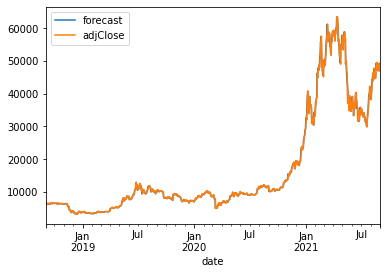

In [38]:
arima.plot_predict(dynamic=False);

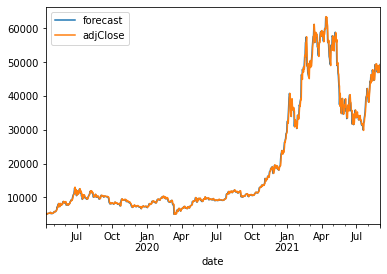

In [39]:
arima_train.plot_predict(dynamic=False);

In [40]:
arima_test = ARIMA(test, order=(1, 1, 1)).fit()
arima_test.summary()

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.41769D+00    |proj g|=  2.72786D-03

At iterate    5    f=  6.41547D+00    |proj g|=  2.92619D-03

At iterate   10    f=  6.41384D+00    |proj g|=  8.86313D-04

At iterate   15    f=  6.41375D+00    |proj g|=  4.92051D-05

At iterate   20    f=  6.41371D+00    |proj g|=  1.74971D-05

At iterate   25    f=  6.41371D+00    |proj g|=  1.53655D-05

At iterate   30    f=  6.41371D+00    |proj g|=  1.20792D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                  219
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1404.601
Method:                       css-mle   S.D. of innovations            147.168
Date:                Fri, 03 Sep 2021   AIC                           2817.203
Time:                        09:33:01   BIC                           2830.759
Sample:                             1   HQIC                          2822.678
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.4919     10.084      0.941      0.347     -10.273      29.257
ar.L1.D.adjClose    -0.9722      0.019    -52.337      0.000      -1.009      -0.936
ma.L1.D.adjClose     1.0000      0.012     84.109      0.000       0.977       1.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0286           +0.0000j            1.0286            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [41]:
df_predict = pd.DataFrame(arima.predict(), columns=['prediction'])

In [42]:
df_predict

,prediction
date,
2021-09-02,-38.459148
2021-09-01,-30.154162
2021-08-31,-6.166061
2021-08-30,79.130075
2021-08-29,-91.637362
...,...
2018-09-06,-62.749588
2018-09-05,-34.406644
2018-09-04,-65.025326


In [43]:
merged_df = df_predict.merge(df_3years, on='date')

In [44]:
merged_df['predict_price'] = merged_df['prediction'] + merged_df['adjClose']

In [45]:
merged_df

,prediction,adjClose,predict_price
date,,,
2021-09-02,-38.459148,49327.722656,49289.263508
2021-09-01,-30.154162,48847.027344,48816.873182
2021-08-31,-6.166061,47166.687500,47160.521439
2021-08-30,79.130075,47054.984375,47134.114450
2021-08-29,-91.637362,48829.832031,48738.194669
...,...,...,...
2018-09-06,-62.749588,6529.169922,6466.420334
2018-09-05,-34.406644,6792.830078,6758.423434
2018-09-04,-65.025326,7361.660156,7296.634830


In [46]:
mean_absolute_percentage_error(merged_df['predict_price'], merged_df['adjClose'])

0.005380589195216473

In [47]:
mean_absolute_error(merged_df['predict_price'], merged_df['adjClose'])

67.71630940091863

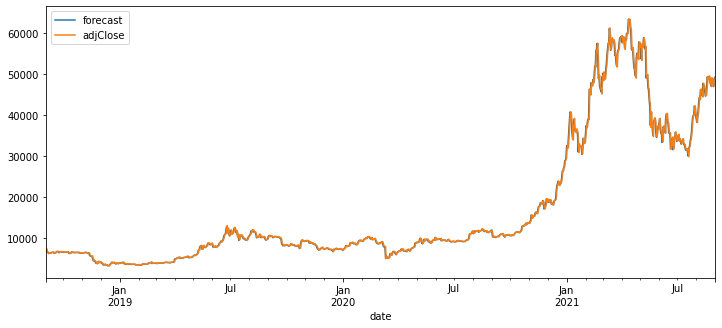

In [48]:
arima.plot_predict(start='2021-09-01', end='2018-09-02', dynamic=False);
fig = plt.gcf(); fig.set_size_inches(12, 5);

In [49]:
df_3years.index

DatetimeIndex(['2021-09-03', '2021-09-02', '2021-09-01', '2021-08-31',
               '2021-08-30', '2021-08-29', '2021-08-28', '2021-08-27',
               '2021-08-26', '2021-08-25',
               ...
               '2018-09-11', '2018-09-10', '2018-09-09', '2018-09-08',
               '2018-09-07', '2018-09-06', '2018-09-05', '2018-09-04',
               '2018-09-03', '2018-09-02'],
              dtype='datetime64[ns]', name='date', length=1098, freq=None)

In [61]:
(forecast, stderr, confidence_int) = arima.forecast(len(test), alpha=0.05)

In [70]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

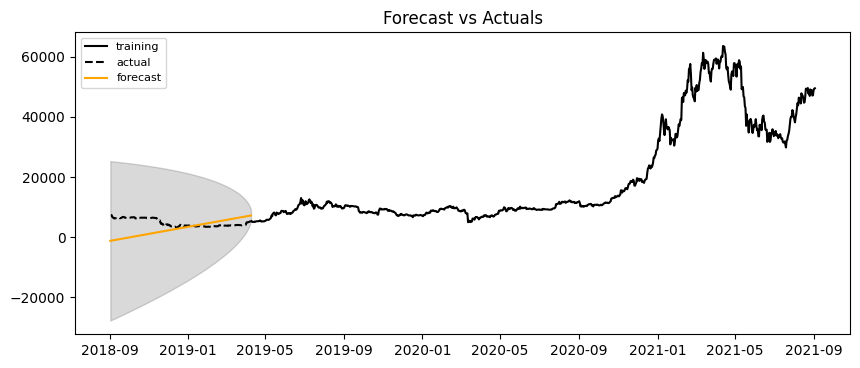

In [71]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

In [51]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

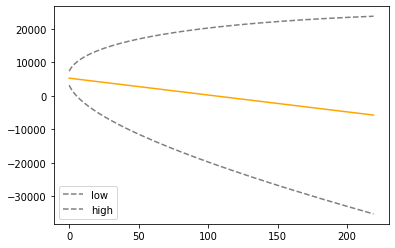

In [52]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend()

In [53]:
forecast.index = test['adjClose'].index
conf_int.index = test['adjClose'].index

<AxesSubplot:title={'center':'Residuals'}, xlabel='date'>

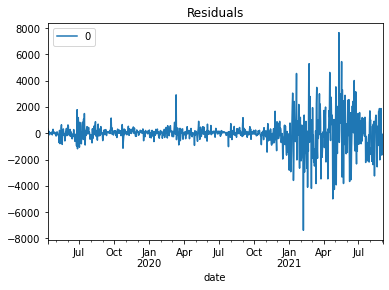

In [54]:
residuals = pd.DataFrame(arima_train.resid)
residuals.plot(title="Residuals")

## Residuals of equal variance over time (not homoscedastic)

<AxesSubplot:title={'center':'Residual density'}, ylabel='Density'>

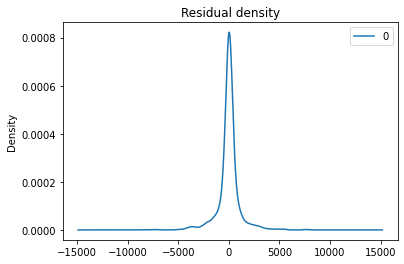

In [55]:
residuals.plot(kind='kde', title='Residual density')